In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Summary:
- We are given some tabulated data related to wine.
- Wines are categorized (first column) into three classes (1,2,3)
- The remaining colums (features) describe chemical properties of the wine.

- We will do a little bit of data extraction, matrix regularization, and statistical inference
- We will see that statistics is an importand part of decision science, but that context can also be critical.


In [2]:
# LendingHome Technical data set and coding questions.
#
# A) Using only the standard Python API (ie. primitives and standard libraries), 
#        # print the color intensity of the 3 wines in each category with the greatest alcohol content.  
#        # Put another way, for each type of wine we’d like to order wines by alcohol content but report 
#        # only the color intensity for the most alcoholic among them. In total there should be nine 
#        # values emitted, 3 wines from each of 3 categories.
# # B) Z-score normalize each column in the dataset
# C) Using a quantitative method, determine whether wines of the same type are more chemically similar 
#      to one another than wines from different varieties.  Feel free to add a written description of 
#      your reasoning to augment any statistical tests, plots, or code you use to establish a conclusion.  
#
import numpy
import scipy
import pylab as plt

#
columns = ["Wine_Type", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
           "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue",
           "OD280/OD315_of_diluted_wines", "Proline"]
data_str = ['1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065',
'1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050', 
'1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185', 
'1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480', 
'1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735', 
'1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450',
'1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290', '2,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295', 
'1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045', '2,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045',
'1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510', '2,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280',
'1,13.75,1.73,2.41,16,89,2.6,2.76,.29,1.81,5.6,1.15,2.9,1320', '1,14.75,1.73,2.39,11.4,91,3.1,3.69,.43,2.81,5.4,1.25,2.73,1150', 
'1,14.38,1.87,2.38,12,102,3.3,3.64,.29,2.96,7.5,1.2,3,1547', '3,13.63,1.81,2.7,17.2,112,2.85,2.91,.3,1.46,7.3,1.28,2.88,1310', 
'1,14.3,1.92,2.72,20,120,2.8,3.14,.33,1.97,6.2,1.07,2.65,1280', '3,13.83,1.57,2.62,20,115,2.95,3.4,.4,1.72,6.6,1.13,2.57,1130', 
'1,14.19,1.59,2.48,16.5,108,3.3,3.93,.32,1.86,8.7,1.23,2.82,1680', '3,13.64,3.1,2.56,15.2,116,2.7,3.03,.17,1.66,5.1,.96,3.36,845', 
'1,14.06,1.63,2.28,16,126,3,3.17,.24,2.1,5.65,1.09,3.71,780', '1,12.93,3.8,2.65,18.6,102,2.41,2.41,.25,1.98,4.5,1.03,3.52,770', 
'1,13.71,1.86,2.36,16.6,101,2.61,2.88,.27,1.69,3.8,1.11,4,1035', '1,12.85,1.6,2.52,17.8,95,2.48,2.37,.26,1.46,3.93,1.09,3.63,1015', 
'1,13.5,1.81,2.61,20,96,2.53,2.61,.28,1.66,3.52,1.12,3.82,845']
#

### A) Wine color
- Print wine_type and color for the three wines, of each type, with the highest alcohol content (per class).
- This can be accomplished via sorting, or by computing an index.

In [3]:
data = numpy.array([[float(s) for s in rw[:-1].split(',')] for rw in data_str])
#
# a column index (a better way is to use a recarray or PANDAS, but this will work too)
ix_cl = {cl:k for k,cl in enumerate(columns)}
#
print('shape: {}'.format(data.shape))
#print('data: ', data)
#
# in the long run, we will do well by handling types and grouping using an index. PANDAS has a
#  grouping function; usually, I write my own.
wine_types = numpy.unique(data[:,0])
print('wine_types: ', wine_types)
#
# A: report color intensity of each wine type, ordered by alcohol content.
# DEBUG: print the whole lot, so we can compare with the truncated (top 3) version:
#if True:
if False:
    for wt in wine_types:
        # use indexing to select each wine type separately. there are other ways to do this; if speed performance
        #  is critical, we might think of something more efficient.
        #
        for rw in (sorted(data[data[:,0]==wt], key=lambda rw:rw[ix_cl['Alcohol']])[::-1]):
            print('type: {}, Alc: {}, color: {}'.format(wt, rw[ix_cl['Alcohol']], rw[ix_cl['Color_intensity']]))
            #print('type: {}, color: {}'.format(wt, rw[ix_cl['Color_intensity']]))
            #
        #
# DEBUG: comment on above:: We can se that we are correctly sorting the array, so now we can
#  truncate each group and, as per the instructions, exclude the alcohol content number.
#  (and skip showing the DEBUG output above as well.)
#
# This will work:
for wt in wine_types:
    for rw in (sorted(data[data[:,0]==wt], key=lambda rw:rw[ix_cl['Alcohol']])[::-1])[0:3]:
        #print('type: {}, Alc: {}, color: {}'.format(wt, rw[ix_cl['Alcohol']], rw[ix_cl['Color_intensity']]))
        print('type: {}, color: {}'.format(wt, rw[ix_cl['Color_intensity']]))
        #
    #

shape: (25, 14)
wine_types:  [1. 2. 3.]
type: 1.0, color: 5.2
type: 1.0, color: 5.4
type: 1.0, color: 5.25
type: 2.0, color: 5.0
type: 2.0, color: 5.05
type: 2.0, color: 7.22
type: 3.0, color: 6.6
type: 3.0, color: 5.1
type: 3.0, color: 7.3


### B)  z-score calculation:
- z-score normalize the array, by column.
- z-score is defined as:
\begin{equation}
z_k = \frac{x_k - \langle x \rangle}{\sigma_x} .
\end{equation}

The z-score has the properties that $\langle z \rangle \to 0$ and $\sigma \to 1$, which can make it a useful method by which to regularize a matrix in order to compare dissimilar input types.

Note also that $z_k$ is a form of t-test, which will be discussed below, and that $z^n$ can be interpreted with respect to the logarithm of a probability distribution -- ie, $z_k^2$ is proportional to the logarithm of a Normal distribution.

In [4]:
# Z-score normalize:
# z = (x-mu)/stdev
#
# compute z-values for input data.
data_zs = numpy.append(data[:,0].reshape(-1,1), (data[:,1:] - numpy.mean(data[:,1:], axis=0))/numpy.std(data[:,1:], axis=0),
                       axis=1)
print(data_zs[0:10])
#data_z = numpy.append(data[:,0].reshape(-1,1), , axis=1)
#
# print a summary and perform a unit test. Proper z-normalization should give <x> -> 0, var(x) -> 1.0
print('mean,vars: ', numpy.mean(data_zs[:,1:], axis=0), numpy.var(data_zs[:,1:], axis=0))
#
#assert (numpy.mean(data_zs[:,1:], axis=0) < 1e-10).all()
mean_check = (numpy.mean(data_zs[:,1:], axis=0) < 1e-10).all()
var_check  = (numpy.var(data_zs[:,1:], axis=0) < 1.0+1e-10).all()
#
print(' mean check: {}, var_check: {}'.format(mean_check, var_check))
#


[[ 1.          0.65242389 -0.46340928 -0.2514274  -0.35802635  1.91744116
  -0.09694939  0.09664249 -0.16814079  0.80018031 -0.02589782 -0.57229575
   1.64148536 -0.40639447]
 [ 1.         -1.33103716 -0.32980693 -1.89363338 -2.0929558  -0.57634069
  -0.53497372 -0.61396404 -0.51843411 -1.50891143 -0.99706624 -0.46786222
   0.3964848  -0.44577378]
 [ 1.         -1.40806478  0.77718393  1.10763962  0.82488009 -0.4839784
  -0.09694939  0.52300641  0.18215253  1.98901962  0.00493292 -0.67672928
  -0.15418853  0.06615724]
 [ 1.          0.92202054 -0.00534409  0.14496715  0.11513623  0.62436909
   2.96922097  1.11517851 -0.86872743  0.54869507  1.63896232 -2.4520993
   0.51619639  1.2475365 ]
 [ 1.         -1.25400955  1.21616306  2.24019547  1.77120525  1.08618054
  -0.09694939 -0.77977223  1.75847246 -0.27434753 -1.04331236 -0.57229575
  -0.72880418 -1.70591166]
 [ 1.          0.59465318 -0.36797903 -0.13817181 -0.51574721  0.53200679
   1.27552687  0.87830967  0.88273916  0.06858688  0.

### C) Differentiation Analysis
- Use a quantitative metric to determine if wines of different categories are significantly chemically different.
- Assume all columns, except Wine_Type (col0) imply chemical properties
- We want to compute a t-test (or z-value) of some type for each class
- For each category, compute a t-test between the class and the full group (all wines); whether or not to include the class being tested in the mean aggregate is subjective (aka, [mean(A) - mean(B+C)] or [mean(A) - mean(A+B+C)] ). For a large number of classes and a large data set, the difference will be small.
- We will illustrate in code both computations.
- We will compute the t-test for each column, and then aggregate. Based on this we can assess the variance for each category.
- Note, the method of aggregation is important, and requires careful consideration depending on what we mean by "similar."

#### Geometric Interpretation:
- We can interpret this columns (features) as independent (orthogonal) components of a vector defining the distance between the expected and observed values.
- If all components are assumed to be random, normal distributed numbers with $\sigma = 1$, then we expect a hyper-sphere with radius $R^2 = \sum_k^d {x_k^2}$, where $x_k$ is the $kth$ column value (vector component) and $d$ is the number of dimensions (in our case, $d=14$).
- For our $d=14$ space, we expect $R \approx 3.74$, from random variability.
- Note that, because we have z-normalized the matrix so that $\sigma_k = 1$, this is equivalent to computing the mean square component length. We can, of course, easily simulate this:

simulated radii
<R>, var(R)
**  [[11.42087527  0.81577514]
 [ 5.35077142  0.35708804]
 [ 7.83819711  0.51160416]
 [16.44063442  1.06861469]
 [13.47912895  0.9621349 ]
 [ 6.66304786  0.36849261]
 [12.76280247  0.8336857 ]
 [19.16799142  1.33097506]
 [ 7.56899868  0.53928517]
 [12.66513682  0.83221341]
 [24.64988946  1.62314965]
 [13.08983971  0.93477206]
 [11.21867538  0.62719621]
 [12.48759822  0.88077785]
 [ 8.96594753  0.63765711]]
** **  [14.03742707  0.93141016]
** **  [3.74665545 0.96509593]
** **  3.679197715354157
[ 1.00386018  1.98651184  2.98846336  4.00778614  4.98266617  5.98338203
  6.98599825  7.99180354  8.98173492 10.0198475  11.0154161  12.03146074
 13.0589842  14.03742707]


Text(0.5,1,'Expected Radius (squared) for normal distributed hyper-sphere')

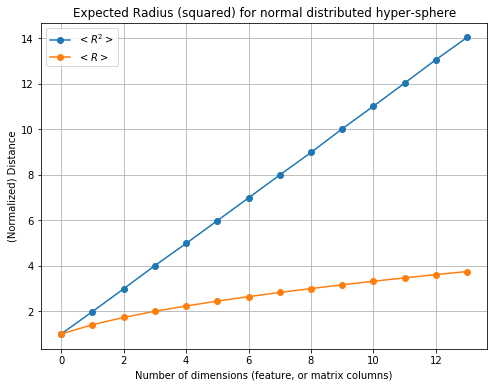

In [5]:
# Even if we are really good at statistics, it can be good process to simulate some examples and see how
#  the numbers turn out. With modern computers, it is so very easy to simuate thousands or even millions
#  of samples, for simple problems at least, that it can be an inexpensive way to test a hypothesis or
# assumption experimentally
#
# Simulating expected t-space radii
#
# make a test array of N(=1000?) random 14D radii, normally distributed.
#
random_radii = numpy.random.normal(loc=0., scale=1., size=140000).reshape(-1,14)
#
# nominally, we should subtract from the column mean, but we know it is going to be 0.
R_sqrs = numpy.sum(random_radii**2., axis=1)
R_vars = numpy.var(random_radii, axis=1) 
#
RV = numpy.array([R_sqrs, R_vars]).T
#
print('simulated radii\n<R>, var(R)')
print('** ', RV[0:15])
#
print('** ** ', numpy.mean(RV, axis=0))
print('** ** ', numpy.sqrt(numpy.mean(RV, axis=0)))
#
print('** ** ', numpy.mean(RV[:,0]**.5))

# mean (expected) radii**2 for 1<k<14 dimensions:
#
Rs_k = numpy.mean(numpy.cumsum(random_radii**2., axis=1), axis=0)
print(Rs_k)
#
fg = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.grid()
#
ax.plot(Rs_k, ls='-', marker='o', label='$  < R^2 > $')
ax.plot(numpy.sqrt(Rs_k), ls='-', marker='o', label='$<R> $')
#
ax.legend(loc=0)
ax.set_ylabel('(Normalized) Distance')
ax.set_xlabel('Number of dimensions (feature, or matrix columns)')
ax.set_title('Expected Radius (squared) for normal distributed hyper-sphere')

#### Using mean aggregate:
- It is tempting to estimate similarity based on the mean of the t-test values (the mean of each column for each class)
- Estimate "difference" based on the mean difference for each wine_type (in other words, compute and average the t-test values for each column, for each class between the aggregate).
- This gives the length of the vector in the t-space, which we (naively?) assume to be the radius of a hyper-sphere.
- The advantage of this is that, nominally, it is stationary; the value does not increase when we add or subtract categories (features, columns); invariably, the distance between the specific class paramters vector and the population parameters vector will not increase (even if only by a little bit) as we add features. 
- On the other hand, if we have a bunch of features that *are* very similar, they will dilute the dissimilar features.

Taking a look at the mean value analysis...

In [6]:
#
# for clarity, block out the for-loops. There may be a smarter, faster way to do this, but 1) blocking out
#  the loops is easier to read (for most people), and 2) we want to be careful about computing indices
#  multiple times.
#
# Inclusive (the class being evaluated is included in the mean aggregate)
z_class_inclusive = []
for k in sorted(set(data[:,0])):
    ix = data[:,0]==k
    #
    z_class_inclusive += [numpy.append([k], ((numpy.mean(data[ix,1:])- numpy.mean(data[:,1:], axis=0))**2.)/
                                    ((numpy.var(data[ix,1:]) + numpy.var(data[:,1:], axis=0))) )]
z_class_inclusive = numpy.array(z_class_inclusive)
#
# the class being evalueted is excluded from the aggregate
z_class_exclusive = []
for k in sorted(set(data[:,0])):
    ix1 = data[:,0]==k
    ix2 = numpy.invert(ix)
    #
    z_class_exclusive += [numpy.append([k], ((numpy.mean(data[ix1,1:])- numpy.mean(data[ix2,1:], axis=0))**2.)/
                                    ((numpy.var(data[ix1,1:]) + numpy.var(data[ix2,1:], axis=0))) )]
z_class_exclusive = numpy.array(z_class_exclusive)
#
#print('** ** ', z_class_inclusive[:,0].reshape(-1,1))
#print('*  ** ', numpy.mean(z_class_inclusive[:,1:], axis=1))

# Summary (RMS aggregate along axis1):
summary_inclusive_mean =numpy.append(z_class_inclusive[:,0].reshape(-1,1),  numpy.mean(z_class_inclusive[:,1:],
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
summary_exclusive_mean =numpy.append(z_class_exclusive[:,0].reshape(-1,1),  numpy.mean(z_class_exclusive[:,1:],
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
print('*** Inclusive summary:\n', summary_inclusive_mean)
print('\n*** Exclusive summary:\n', summary_exclusive_mean)

*** Inclusive summary:
 [[1.         0.89748569]
 [2.         0.89735115]
 [3.         0.90322771]]

*** Exclusive summary:
 [[1.         0.89341005]
 [2.         0.89329872]
 [3.         0.89911373]]


#### Interpreting the results:
- First, the inclusive/exclusive analyses are very similar, so we will save that debate for another day.
- Each class shows a mean t-test score of $t \approx 0.9$, meaning the mean aggregated "distance" between the parameters vector for each class and the population mean is less than a standard deviation. Based on this, it can be said that the different wine classes have similar, not significantly different, chemistry.
- **If, however**, we look more closely, we see that for each class, there are two categories -- Magnesium and Proline, that show significant variance (large t-test values for that colunn). The remainig columns are all very similar, $t_k \ll 1$
- We probably need a different metric.
- Maybe a vector, not a scalar? A counting metric, ie is there one or more component with $t>t_0$?

First, let's have a look at the summary tables. We also show a graphical representation of the "inclusive" vector components.

inclusive: 
 [[1.         0.03361498 0.2354844  0.22289046 0.01367364 4.30949093
  0.21439234 0.21004995 0.27812508 0.23581123 0.15287452 0.25705844
  0.20509125 4.10269021]
 [2.         0.03523745 0.23956801 0.22687172 0.01472305 4.28670339
  0.21830236 0.21392292 0.28253473 0.23989756 0.15621193 0.26131109
  0.20892146 4.0839025 ]
 [3.         0.03630846 0.24458114 0.23165663 0.01529319 4.34098
  0.22293193 0.21847288 0.28831642 0.24491685 0.15969703 0.26671474
  0.21338052 4.12241403]]

exclusive: 
 [[1.         0.03337299 0.23618307 0.22338657 0.01445431 4.18488818
  0.21439077 0.21034534 0.27812667 0.23471717 0.15465338 0.25715844
  0.20416284 4.13051991]
 [2.         0.03498981 0.24027231 0.22737194 0.01553215 4.16254615
  0.21830076 0.21422082 0.28253634 0.2387947  0.15800891 0.26141185
  0.20798499 4.11180309]
 [3.         0.03605518 0.2452982  0.23216588 0.01612379 4.21498744
  0.22293027 0.21877615 0.28831805 0.24379413 0.16152745 0.26681731
  0.21242701 4.15005059]]


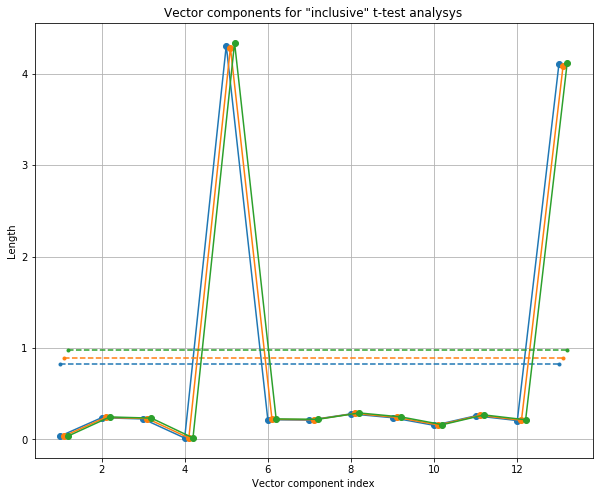

In [7]:
print('inclusive: \n', z_class_inclusive)
print('\nexclusive: \n', z_class_exclusive)

fg = plt.figure(figsize=(10,8))
ax = plt.gca()
ax.grid()
ax.set_title('Vector components for "inclusive" t-test analysys')
ax.set_xlabel('Vector component index')
ax.set_ylabel('Length')
#
for k,rw in enumerate(z_class_inclusive):
    x = numpy.arange(1,len(rw)) + .1*k
    ln, = ax.plot(x, rw[1:], ls='-', marker='o')
    clr = ln.get_color()
    ax.plot(x[0::len(x)-1], numpy.ones(2)*numpy.mean(rw), ls='--', marker='.', color=clr)
    

As discussed, we might just look at the total vector length, but still, we find a total vector length that is actually a bit less than (but not by much) expected.

In [8]:
# Summary (RMS aggregate along axis1):
summary_inclusive_sum =numpy.append(z_class_inclusive[:,0].reshape(-1,1),  numpy.sum(z_class_inclusive[:,1:],
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
summary_exclusive_sum =numpy.append(z_class_exclusive[:,0].reshape(-1,1),  numpy.sum(z_class_exclusive[:,1:],
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
print('*** Inclusive summary:\n', summary_inclusive_sum)
print('\n*** Exclusive summary:\n', summary_exclusive_sum)

*** Inclusive summary:
 [[1.         3.23593069]
 [2.         3.23544559]
 [3.         3.25663382]]

*** Exclusive summary:
 [[1.         3.22123573]
 [2.         3.22083434]
 [3.         3.24180065]]


#### Variance:
- The variance of the vector components might be a viable metric. We expect $\sigma^2 \approx 1$; we see that it is a bit more than that.

In [9]:
# Summary (RMS aggregate along axis1):
summary_inclusive_sum =numpy.append(z_class_inclusive[:,0].reshape(-1,1),  numpy.var(z_class_inclusive[:,1:],
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
summary_exclusive_sum =numpy.append(z_class_exclusive[:,0].reshape(-1,1),  numpy.var(z_class_exclusive[:,1:],
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
print('*** Inclusive summary:\n', summary_inclusive_sum)
print('\n*** Exclusive summary:\n', summary_exclusive_sum)

*** Inclusive summary:
 [[1.         1.4525945 ]
 [2.         1.44387852]
 [3.         1.45928952]]

*** Exclusive summary:
 [[1.         1.43456393]
 [2.         1.42595379]
 [3.         1.44092518]]


In [10]:
# components > 1:
#
# Summary (RMS aggregate along axis1):
#
xx_i = (z_class_inclusive[:,1:]>1).astype(float)
xx_e = (z_class_exclusive[:,1:]>1).astype(float)
print(xx_i)
#
summary_inclusive_sum =numpy.append(z_class_inclusive[:,0].reshape(-1,1), numpy.sum((z_class_inclusive[:,1:]*xx_i),
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
summary_exclusive_sum =numpy.append(z_class_exclusive[:,0].reshape(-1,1), numpy.sum( (z_class_exclusive[:,1:]*xx_e),
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
print('*** Inclusive summary:\n', summary_inclusive_sum)
print('\n*** Exclusive summary:\n', summary_exclusive_sum)
#
# slightly more 'correct', subtract off the unit part of r>1:

summary_inclusive_sum =numpy.append(z_class_inclusive[:,0].reshape(-1,1), numpy.sum(((z_class_inclusive[:,1:]-xx_i)*xx_i),
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
summary_exclusive_sum =numpy.append(z_class_exclusive[:,0].reshape(-1,1), numpy.sum( ((z_class_exclusive[:,1:]-xx_e)*xx_e),
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
print('*** Inclusive summary:\n', summary_inclusive_sum)
print('\n*** Exclusive summary:\n', summary_exclusive_sum)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]]
*** Inclusive summary:
 [[1.         2.90037603]
 [2.         2.89319994]
 [3.         2.9091913 ]]

*** Exclusive summary:
 [[1.         2.88364493]
 [2.         2.87651686]
 [3.         2.89223755]]
*** Inclusive summary:
 [[1.         2.53222849]
 [2.         2.52400592]
 [3.         2.5423206 ]]

*** Exclusive summary:
 [[1.         2.51304757]
 [2.         2.50486511]
 [3.         2.5229027 ]]


#### Interpreting the results (again):
Looking at these newer metric -- both the variance and $sum_{x>1} {x_k^2$ metrics, it is probably more accurate to say that in fact, each class of wine is chemically distinct -- that there is at least one chemical component that is significantly different for each class. 


### Conclusion:
- The question, "Is each class of wine chemically different," is subjective. More likely than not, a more specific question should be asked -- as discussed above.
- Based on this analysis, it is tempting to say that the mean value, for each column, of the t-tests between each class and the population is small, so no; they are not different. Another way to say this is that the mean component of the distance between the parameter vectors of each class and the population is small ($<1$).
- On the other hand, for each class, there are two components with large magnitudes $x_k > 4.0$, so yes. They are different.
- Note that the data and the problem are designed to be tricky. Specifically, the variance in the observables is designed so that the mean radius in z-space is $\langle R^2 \rangle \approx N$ (it is approximately a unit sphere), but this is not evenly distributed.j

- What about the variances of thes values? We expect them to be $\sigma^2 \approx 1$.

#### Recommended Interpretation/Suggestion:
- The data indicate that the wine classes *are* different.
- Variance analysis suggests larger than expected variability in the vector components. This suggests some vector components (features) exhibit significant differences between categoroes (or more specifically for each category compared to the mean).
- We can also aggregate only the portion of vector components outside of the "normal" range, $x_k > 1$. For "similar" classes, we expect this metric to be very close to zero.
- Generally, we probably need a more specific definition of what we mean by, "similar."


In [11]:
summary_inclusive_var =numpy.append(z_class_inclusive[:,0].reshape(-1,1),  numpy.mean(z_class_inclusive[:,1:],
                                                                                  axis=1).reshape(-1,1)**.5, axis=1)
print('var of t: ', summary_inclusive_var)

var of t:  [[1.         0.89748569]
 [2.         0.89735115]
 [3.         0.90322771]]
